# **Business Problem**

Mengidentifikasi penjualan tiap item pada Restoran ini untuk dilihat pada waktu kapan mereka laku terjual guna meningkatkan pendapatan penjualan sebesar 10% dalam kurun waktu satu bulan.

# **Import Library**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **Data Loading**

In [2]:
df = pd.read_csv("Balaji Fast Food Sales.csv")
df

,order_id,date,item_name,item_type,item_price,quantity,transaction_amount,transaction_type,received_by,time_of_sale
0,1,07-03-2022,Aalopuri,Fastfood,20,13,260,NaN,Mr.,Night
1,2,8/23/2022,Vadapav,Fastfood,20,15,300,Cash,Mr.,Afternoon
2,3,11/20/2022,Vadapav,Fastfood,20,1,20,Cash,Mr.,Afternoon
3,4,02-03-2023,Sugarcane juice,Beverages,25,6,150,Online,Mr.,Night
4,5,10-02-2022,Sugarcane juice,Beverages,25,8,200,Online,Mr.,Evening
...,...,...,...,...,...,...,...,...,...,...
995,996,3/19/2023,Frankie,Fastfood,50,10,500,NaN,Mrs.,Evening
996,997,9/20/2022,Sandwich,Fastfood,60,7,420,NaN,Mr.,Evening
997,998,1/26/2023,Sandwich,Fastfood,60,13,780,NaN,Mr.,Evening
998,999,8/27/2022,Panipuri,Fastfood,20,5,100,NaN,Mrs.,Afternoon


[Dataset from Kaggle](https://www.kaggle.com/datasets/rajatsurana979/fast-food-sales-report)

# **Data Cleaning**

In [3]:
# Melihat informasi dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            1000 non-null   int64 
 1   date                1000 non-null   object
 2   item_name           1000 non-null   object
 3   item_type           1000 non-null   object
 4   item_price          1000 non-null   int64 
 5   quantity            1000 non-null   int64 
 6   transaction_amount  1000 non-null   int64 
 7   transaction_type    893 non-null    object
 8   received_by         1000 non-null   object
 9   time_of_sale        1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.3+ KB


In [4]:
df_clean = df.copy()
df_clean['date'] = df_clean['date'].str.replace('/', '-')
df_clean['date'] = pd.to_datetime(df_clean['date'])
df_clean['month'] = df_clean['date'].dt.strftime('%b')
df_clean['year'] = df_clean['date'].dt.year
df_clean.drop_duplicates(inplace=True)

In [5]:
# Membuat kategori pada kolom month agar berurutan dari Januari hingga Desember
df_clean['month'] = pd.Categorical(df_clean['month'], categories=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], ordered=True)

In [6]:
# Mengidentifikasi dan mencetak jumlah pesanan yang memiliki nilai kosong
df_null = df_clean[df_clean['transaction_type'].isna()]
print(df_null.groupby('time_of_sale')['order_id'].count().reset_index())
print('----------------')
print(df_null.groupby('received_by')['order_id'].count().reset_index())

  time_of_sale  order_id
0    Afternoon        24
1      Evening        16
2     Midnight        22
3      Morning        22
4        Night        23
----------------
  received_by  order_id
0         Mr.        53
1        Mrs.        54


In [7]:
# Mengisi nilai kosong dengan "Unknown"
df_clean['transaction_type'] = df_clean['transaction_type'].fillna('Unknown')
transaction_type = df_clean['transaction_type'].value_counts()
print(transaction_type)

Cash       476
Online     417
Unknown    107
Name: transaction_type, dtype: int64


# **Exploratory Data Analysis**

In [8]:
# Melihat perhitungan statistika pada kolom numerik di dataset
df_clean[['item_price', 'quantity', 'transaction_amount']].describe()

,item_price,quantity,transaction_amount
count,1000.000000,1000.000000,1000.000000
mean,33.315000,8.162000,275.230000
std,14.921744,4.413075,204.402979
min,20.000000,1.000000,20.000000
25%,20.000000,4.000000,120.000000
50%,25.000000,8.000000,240.000000
75%,50.000000,12.000000,360.000000
max,60.000000,15.000000,900.000000


Pada perhitungan statistik di atas, standar deviasi pada item_price dan quantity tidak terlalu jauh dibandingkan dengan rata-rata masing kolom. Sedangkan standar deviasi pada transaction_amount cukup jauh dengan rata-ratanya. 

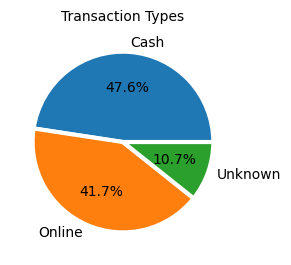

In [9]:
# Membuat pie chart pada "transaction_type"
fig, ax = plt.subplots(figsize=(3, 3))

ax.pie(transaction_type, labels=transaction_type.index, autopct='%.1f%%', wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'})
ax.set_title('Transaction Types', fontsize=10)
plt.tight_layout()

Pembayaran tunai lebih banyak dilakukan pembeli daripada non tunai. Dan untuk data yang tidak diketahui, dapat dilakukan diskusi dengan tim untuk menganalisis data yang hilang tersebut apa.

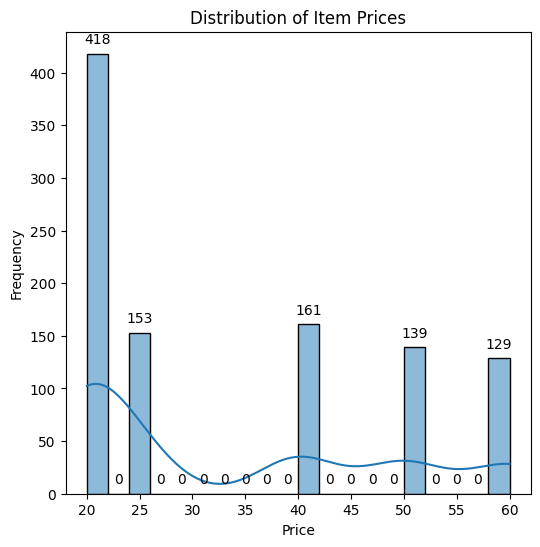

In [10]:
# Membuat histogram pada distribusi "item_price"
plt.figure(figsize=(6, 6))
sns.histplot(df_clean['item_price'], bins=20, kde=True)
plt.title('Distribution of Item Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')

# Menambahkan label angka pada setiap bar
for p in plt.gca().patches:
    plt.gca().annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

Terlihat bahwa distribusi terbanyak ada pada harga 20 Rupee dengan 418 item. Dan yang terendah adalah pada harga 60 Rupee yaitu sebanyak 129 item. Maka artinya adalah mayoritas pada Restoran ini adalah item yang murah.

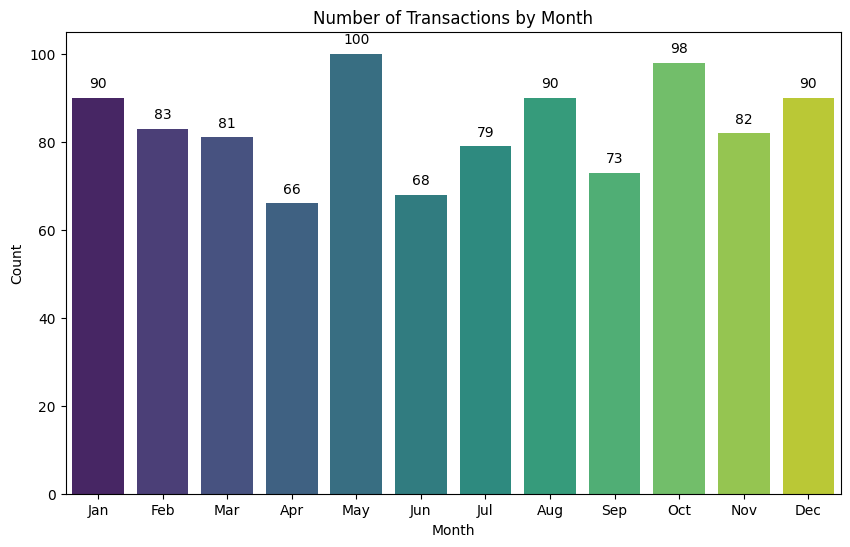

In [11]:
# Membuat bar chart pada jumlah transaksi tiap bulannya
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='month', data=df_clean, palette='viridis')

# Menambahkan label angka pada setiap bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

plt.title('Number of Transactions by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

Jumlah transaksi tertinggi adalah pada bulan Mei yaitu sebanyak 100 transaksi. Sementara yang terendah terdapat pada bulan sebelumnya yaitu April dengan transaksi sebanyak 66. Pun setelah bulan Mei yaitu Juni juga rendah (68 transaksi). Ini menunjukkan bahwa ada kejadian atau sesuatu yang terjadi di India pada bulan Mei. Dan ternyata memang pada bulan Mei sedang puncak-puncaknya musim panas di India, sehingga Restoran ini menjadi banyak pembeli terutama pada Beverages yang cukup laku.

In [12]:
# Melihat seluruh informasi harga tiap item
df_clean[['item_name', 'item_price']].drop_duplicates().sort_values('item_price', ascending=False).reset_index(drop=True)

,item_name,item_price
0,Sandwich,60
1,Frankie,50
2,Cold coffee,40
3,Sugarcane juice,25
4,Aalopuri,20
5,Vadapav,20
6,Panipuri,20


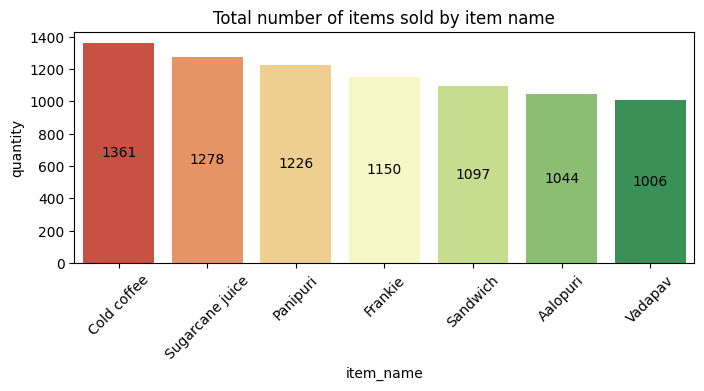

In [13]:
# Membuat bar chart pada total penjualan tiap item
items_quantity = df.groupby('item_name')['quantity'].sum().reset_index().sort_values('quantity', ascending=False)

plt.figure(figsize=(8,3))
ax = sns.barplot(items_quantity, x='item_name', y='quantity', palette='RdYlGn')
ax.bar_label(ax.containers[0], label_type='center')
plt.xticks(rotation=45)
plt.title('Total number of items sold by item name')
plt.show()

Terlihat bahwa item yang paling banyak terjual adalah Cold coffee diikuti oleh Sugarcane Juice. Ini menunjukkan bahwa, meskipun Beverages tidak begitu banyak itemnya, namun sangat efektif untuk dijual terutama pada musim panas. Kemudian yang terendah adalah Vadapav. Meskipun terendah, Vadapav juga dapat dijual dengan efektif di waktu yang tepat.

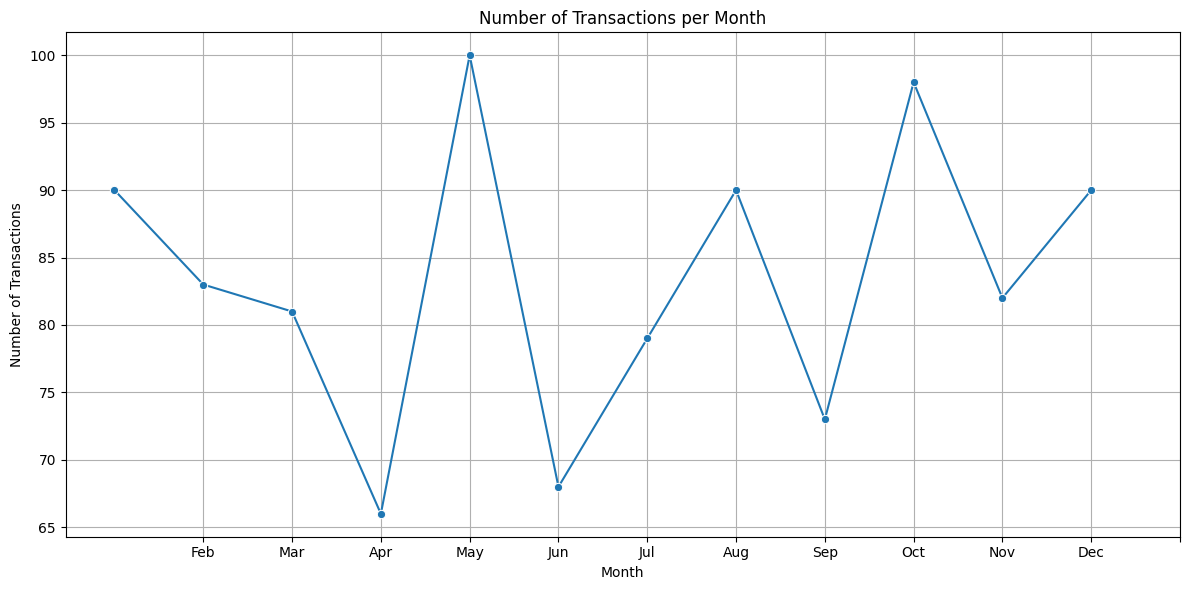

In [14]:
# Menghitung jumlah transaksi per bulan
monthly_transactions = df_clean['month'].value_counts().reset_index().rename(columns={'index': 'month', 'month': 'transaction_count'})

# Membuat plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_transactions, x='month', y='transaction_count', marker='o')

plt.title('Number of Transactions per Month')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.xticks(range(1, 13))
plt.grid(True)
plt.tight_layout()
plt.show()

Penjualan terlihat cukup fluktuatif terutama pada bulan April hingga Juni, yang mana pada bulan Mei transaksi sangat melonjak tinggi sementara pada bulan sebelum dan sesudahnya mengalami drop transactions.

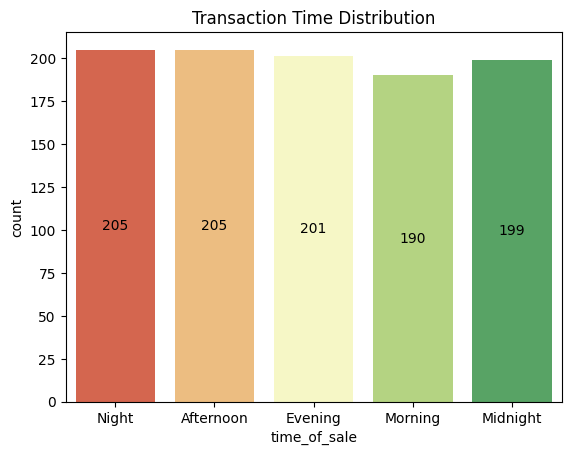

In [15]:
# Membuat bar chart pada transaksi berdasarkan waktu
ax = sns.countplot(df, x='time_of_sale', palette='RdYlGn')
plt.title('Transaction Time Distribution')

ax.bar_label(ax.containers[0],label_type='center')
plt.show()

Transaksi paling diminati adalah pada waktu malam dan siang hari. Dan pada waktu pagi hari, tidak terlalu banyak transaksi. Artinya bahwa memang pada Restoran ini, cocok untuk malam hari, karena makanannya yang mendukung untuk dimakan pada waktu tersebut. Sementara pada siang hari, kebanyakan ada pada transaksi Sugarcane juice. Maka minuman pada restoran ini sangat diminati oleh pembeli di siang hari. Pagi hari tidak terlalu banyak, dikarenakan pada pagi hari tidak terlau cocok untuk menyicipi makanan dan minuman pada Restoran ini. Namun sebenranya transaksi secara keseluruhan cukup merata.

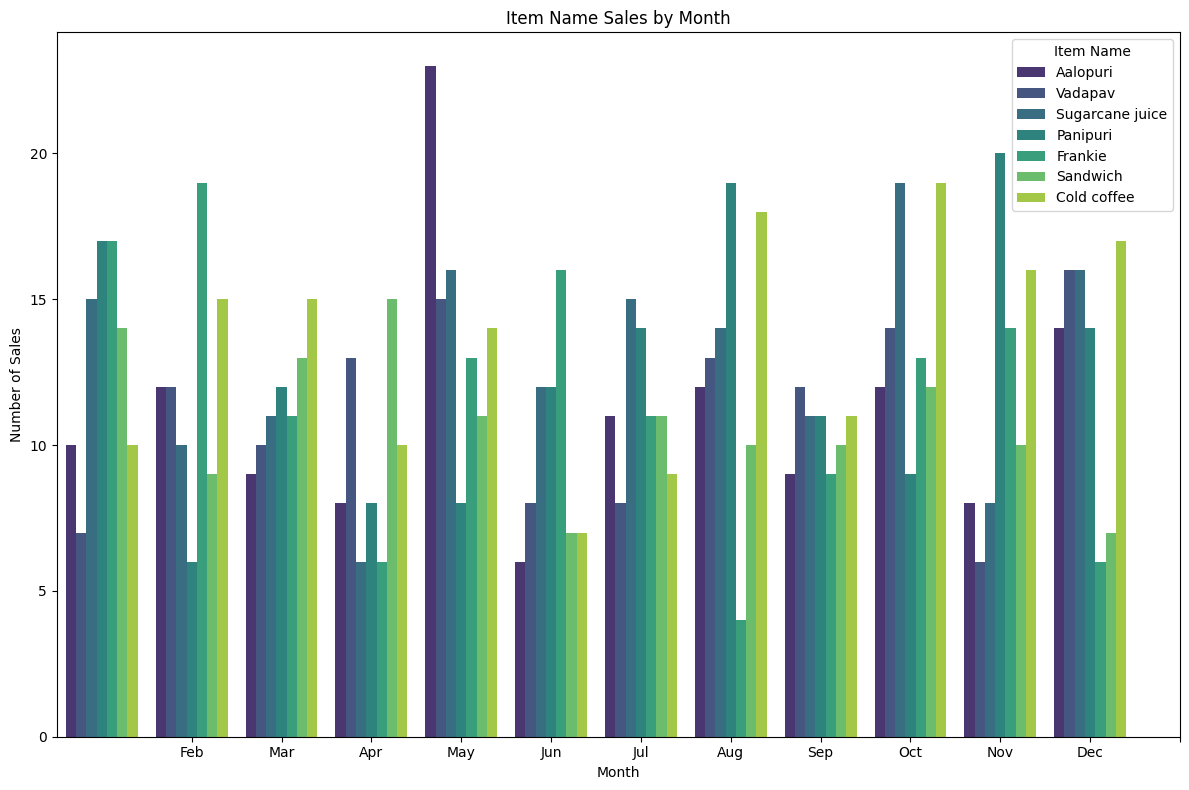

In [16]:
# Visualizing item_name sales based on month
plt.figure(figsize=(12, 8))
sns.countplot(data=df_clean, x='month', hue='item_name', palette='viridis')
plt.title('Item Name Sales by Month')
plt.xlabel('Month')
plt.ylabel('Number of Sales')
plt.xticks(range(1, 13))
plt.legend(title='Item Name')
plt.tight_layout()
plt.show()

Dengan melihat visualisasi di atas, Aalopuri terlihat lebih laku pada bulan Mei. Vadapav cocok dijual pada akhir tahun. Sugarcane juice cukup banyak peminatnya di bulan Oktober. Untuk Panipuri banyak terjual di bulan November. Frankie sangat laku pada bulan Februari. Penjualan Sandwich pada bulan April paling tinggi daripada bulan-bulan lainnya. Dan untuk Cold coffee paling laku berada pada bulan Oktober. Dengan melihat salah satu visualisasi ini, dapat memberikan insight positif untuk strategi penjualan ke depan agar dapat lebih efektif serta efisien.

# **Conclusion**

Dengan melihat seluruh analisis yang menunjang pendapatan penjualan pada Restoran ini, potensi pendapatan penjualan meningkat 10% dalam kurun waktu 1 bulan cukup besar, karena memang terdapat analisis terkait transaksi tiap bulannya, transaksi tiap waktu dalam sehari, hingga melihat item yang terjual tersebut efektif di waktu kapan, yang mana seluruh analisis tersebut dapat membantu Restoran menemukan ide strategis penjualan kedepannya.

# **Save Data Clean**

In [17]:
df_clean.to_csv("Basaji Fast Food Sales - Clean.csv", index=False)
df_clean.to_excel("Basaji Fast Food Sales - Clean.xlsx", index=False)
print("Successfully Converted")

Successfully Converted


Melakukan penyimpanan pada data yang sudah dibersihkan untuk dianalisis lebih lanjut pada Spreadsheet maupun Looker Studio. Berikut linknya:<br>
[Spreadsheet](https://docs.google.com/spreadsheets/d/1PYUXNpAIepVZ-HIn97dAwBatW9jyr2hgquzuQhQEAoU/edit?usp=sharing)<br>
[Looker Studio](https://lookerstudio.google.com/reporting/1fbe2472-82a7-4aa5-8554-3efeac8fe5cf)</br></br>